In [ ]:
pip install tensorflow matplotlib numpy pandas scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/sample_data/depression_data.csv')


X = df.drop(columns=['depression'])
y = df['depression']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X = df.drop(columns=['depression'])
y = df['depression']




In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from google.colab import files

df = pd.read_csv('/content/sample_data/depression_data.csv')

le = LabelEncoder()

columns_to_encode = [
    'Age', 'Marital Status', 'Number of Children', 'Smoking Status',
    'Physical Activity Level', 'Employment Status', 'Income', 'Alcohol Consumption',
    'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
    'History of Substance Abuse', 'Family History of Depression', 'depression'
]

for col in columns_to_encode:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))
    else:
        print(f"Column '{col}' does not exist in the DataFrame")

csv_file = '/content/encoded_depression_data.csv'
df.to_csv(csv_file, index=False)

# Download the CSV file
files.download(csv_file)


               Name  Age  Marital Status  Number of Children  Smoking Status  \
0  Christine Barker   13               1                   2               2   
1  Jacqueline Lewis   37               1                   1               2   
2    Shannon Church   60               3                   1               2   
3    Charles Jordan   40               0                   3               2   
4      Michael Rich    0               2                   0               2   

   Physical Activity Level  Employment Status  Income  Alcohol Consumption  \
0                        0                  1  154792                    2   
1                        2                  0  250977                    0   
2                        2                  0   41828                    1   
3                        1                  1  405104                    2   
4                        2                  1  368901                    1   

   Dietary Habits  Sleep Patterns  History of Ment

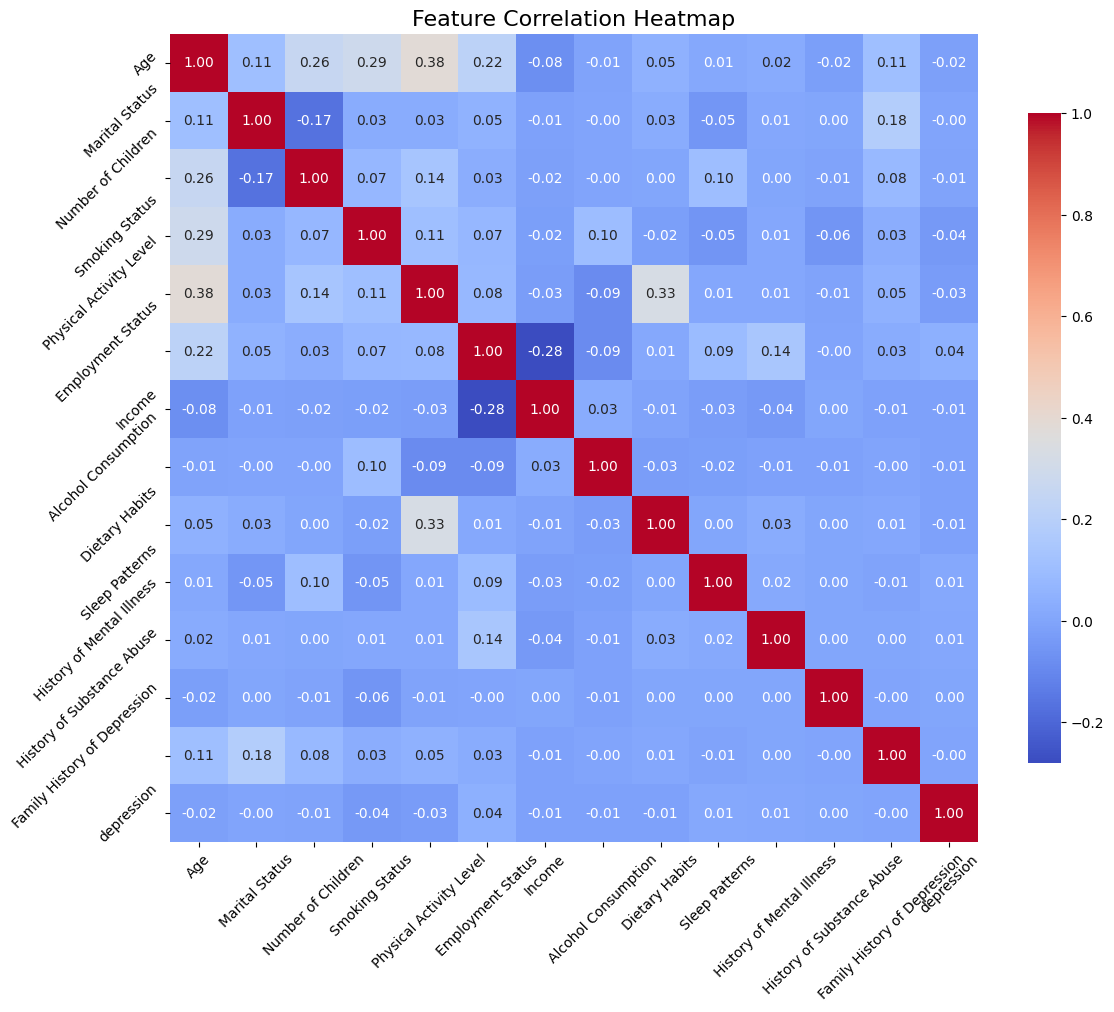

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/encoded_depression_data.csv'
df = pd.read_csv(file_path)

print(df.head())

if 'Name' in df.columns:
    df = df.drop(columns=['Name'])

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
df.depression.value_counts()

,count
depression,
0,277561
1,136207


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('/content/encoded_depression_data.csv')


df.dropna(inplace=True)

features = df[['Employment Status', 'Sleep Patterns', 'History of Mental Illness']]
target = df['depression']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)

selector = RFE(model, n_features_to_select=3)
selector = selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.support_]
print("Selected Features:", selected_features.tolist())

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Selected Features: ['Employment Status', 'Sleep Patterns', 'History of Mental Illness']
Accuracy: 0.6707591173840539
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80     55508
           1       0.00      0.00      0.00     27246

    accuracy                           0.67     82754
   macro avg       0.34      0.50      0.40     82754
weighted avg       0.45      0.67      0.54     82754



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from google.colab import files

df = pd.read_csv('/content/encoded_depression_data.csv')

selected_features_df = df[['Employment Status', 'Sleep Patterns', 'History of Mental Illness', 'depression']]
selected_features_df.to_csv('/content/selected_depression_features.csv', index=False)

files.download('/content/selected_depression_features.csv')


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

df = pd.read_csv('/content/selected_depression_features.csv')

scaler = MinMaxScaler()


normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


csv_file = '/content/normalized_depression_data.csv'
normalized_df.to_csv(csv_file, index=False)


files.download(csv_file)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

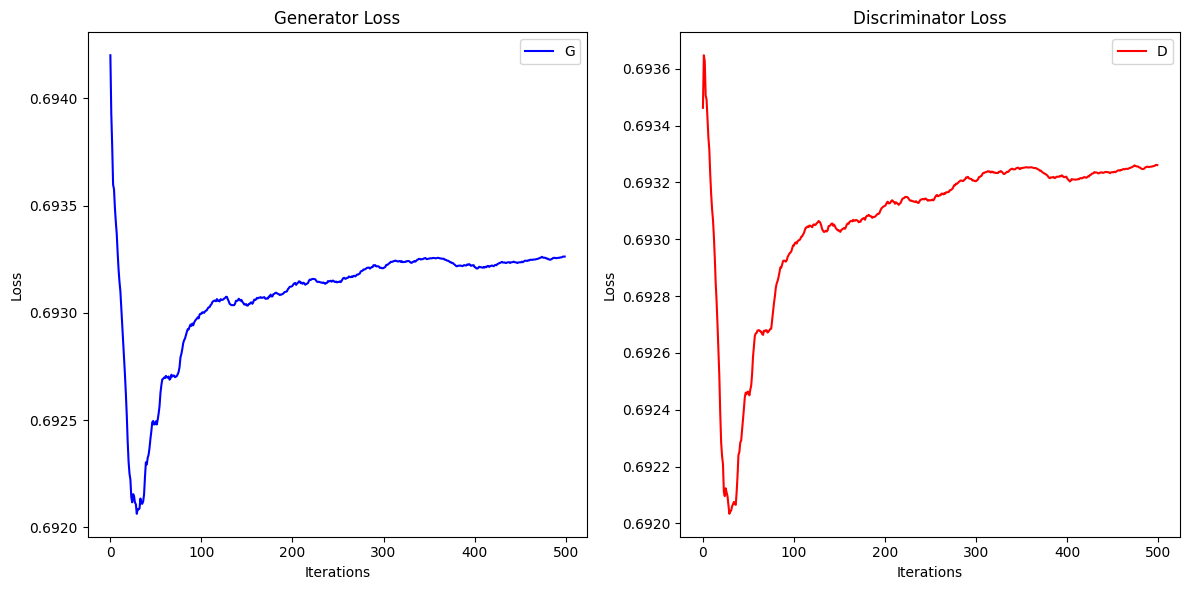

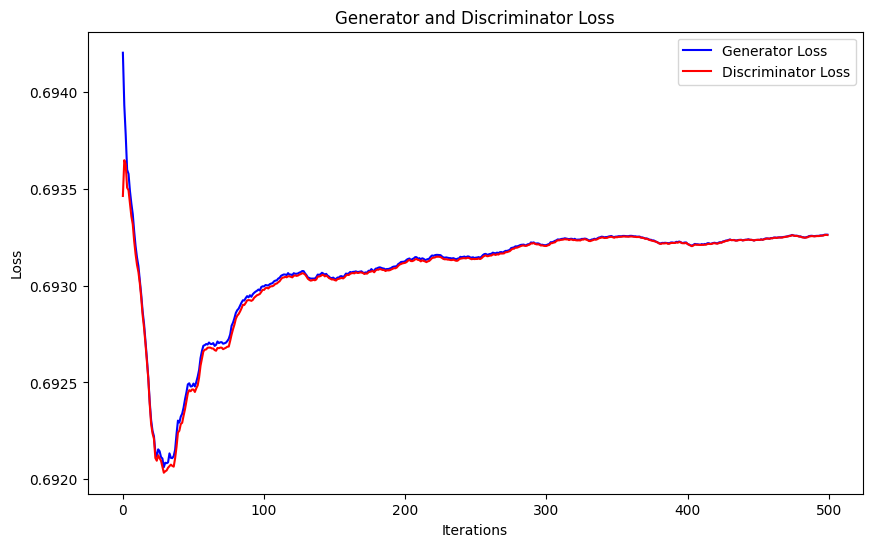

2069/2069 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, LeakyReLU, BatchNormalization, Embedding, Flatten, multiply, Dropout
from keras.optimizers import Adam
from keras.initializers import RandomNormal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

class cGAN():
    def __init__(self, latent_dim=32, out_shape=3):
        self.latent_dim = latent_dim
        self.out_shape = out_shape
        self.num_classes = 2

        self.generator = self.build_generator()
        self.discriminator = self.build_discriminator()

        self.discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        gen_sample = self.generator([noise, label])
        self.discriminator.trainable = False
        validity = self.discriminator([gen_sample, label])

        self.combined = Model([noise, label], validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

    def build_generator(self):
        init = RandomNormal(mean=0.0, stddev=0.02)
        model = Sequential()

        model.add(Dense(128, input_dim=self.latent_dim, kernel_initializer=init))
        model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(256, kernel_initializer=init))
        model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(512, kernel_initializer=init))
        model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))


        model.add(Dense(self.out_shape, activation='sigmoid'))

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))

        model_input = multiply([noise, label_embedding])
        gen_sample = model(model_input)
        return Model([noise, label], gen_sample, name="Generator")

    def build_discriminator(self):
        model = Sequential()
        model.add(Dense(512, input_dim=self.out_shape))  # Update input dimension as needed
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))

        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))

        model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

        # Inputs: sample (features) and label (depression or not)
        sample = Input(shape=(self.out_shape,))  # Update as needed
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.out_shape)(label))
        model_input = multiply([sample, label_embedding])

        validity = model(model_input)
        return Model([sample, label], validity)

    def train(self, X_train, y_train, pos_index, neg_index, epochs, sampling=False, batch_size=32, sample_interval=100, plot=True):
        global G_losses
        global D_losses

        G_losses = []
        D_losses = []
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):
            if sampling:
                idx1 = np.random.choice(pos_index, 8)
                idx0 = np.random.choice(neg_index, batch_size - 8)
                idx = np.concatenate((idx1, idx0))
            else:
                idx = np.random.choice(len(y_train), batch_size)

            # Ensure samples are indexed correctly
            samples = X_train[idx]  # Directly use numpy array indexing
            labels = y_train[idx].reshape(-1, 1)  # Ensure labels are shaped correctly

            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_samples = self.generator.predict([noise, labels])

            # Label smoothing
            if epoch < epochs // 1.5:
                valid_smooth = (valid + 0.1) - (np.random.random(valid.shape) * 0.1)
                fake_smooth = (fake - 0.1) + (np.random.random(fake.shape) * 0.1)
            else:
                valid_smooth = valid
                fake_smooth = fake

            # Train the discriminator
            self.discriminator.trainable = True
            d_loss_real = self.discriminator.train_on_batch([samples, labels], valid_smooth)
            d_loss_fake = self.discriminator.train_on_batch([gen_samples, labels], fake_smooth)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train Generator
            self.discriminator.trainable = False
            sampled_labels = np.random.randint(0, self.num_classes, batch_size).reshape(-1, 1)
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            if (epoch + 1) % sample_interval == 0:
                print('[%d/%d] Loss_D: %.4f Loss_G: %.4f' % (epoch + 1, epochs, d_loss[0], g_loss[0]))

            G_losses.append(g_loss[0])
            D_losses.append(d_loss[0])

            # Plot G and D losses separately at the end of training
            if plot and epoch + 1 == epochs:
                # Plot Generator Loss
                plt.figure(figsize=(12, 6))

                plt.subplot(1, 2, 1)
                plt.title("Generator Loss")
                plt.plot(G_losses, label="G", color='blue')
                plt.xlabel("Iterations")
                plt.ylabel("Loss")
                plt.legend()

                # Plot Discriminator Loss
                plt.subplot(1, 2, 2)
                plt.title("Discriminator Loss")
                plt.plot(D_losses, label="D", color='red')
                plt.xlabel("Iterations")
                plt.ylabel("Loss")
                plt.legend()

                plt.tight_layout()
                plt.show()
                # Plot combined G and D losses at the end of training
                if plot and epoch + 1 == epochs:
                  plt.figure(figsize=(10, 6))
                  plt.plot(G_losses, label="Generator Loss", color='blue')
                  plt.plot(D_losses, label="Discriminator Loss", color='red')
                  plt.title("Generator and Discriminator Loss")
                  plt.xlabel("Iterations")
                  plt.ylabel("Loss")
                  plt.legend()
                  plt.show()


data = pd.read_csv('/content/normalized_depression_data.csv')  # Update the path as needed

data['depression'] = data['depression'].astype(int)  # Ensure the target variable is in the correct format
X = data.drop('depression', axis=1).values  # Feature set
y = data['depression'].values  # Target variable

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Get 80% of the input dataset
X_train = X[:int(0.8 * len(X))]
y_train = y[:int(0.8 * len(y))]

# Train the cGAN
epochs = 500
cgan = cGAN(latent_dim=32, out_shape=X_train.shape[1])  # Update out_shape as needed
pos_index = np.where(y_train == 1)[0]  # Indices for positive samples
neg_index = np.where(y_train == 0)[0]  # Indices for negative samples

cgan.train(X_train, y_train, pos_index, neg_index, epochs, sampling=True)

# Generate new samples
num_new_samples = int(0.2 * len(X_train))  # Generate 20% of the original 20%
noise = np.random.normal(0, 1, (num_new_samples, cgan.latent_dim))
sampled_labels = np.random.randint(0, cgan.num_classes, num_new_samples).reshape(-1, 1)
generated_samples = cgan.generator.predict([noise, sampled_labels])

# Convert generated samples back to DataFrame
generated_df = pd.DataFrame(generated_samples, columns=data.columns[:-1])  # Exclude 'depression' column if exists
generated_df['depression'] = sampled_labels  # Add the labels back

# Save the generated dataset
generated_df.to_csv('/content/generated_depression_data.csv', index=False)


In [ ]:
from google.colab import files

# Now you can download your file
files.download("/content/generated_depression_data.csv")


In [ ]:
import pandas as pd

generated_data = pd.read_csv('/content/generated_depression_data.csv')
normalized_data = pd.read_csv('/content/normalized_depression_data.csv')

print("Generated Data Preview:")
print(generated_data.head())
print("\nNormalized Data Preview:")
print(normalized_data.head())

combined_data = pd.concat([normalized_data, generated_data], ignore_index=True)

print("\nCombined Data Preview:")
print(combined_data.head())

combined_data.to_csv('/content/after_generated.csv', index=False)

print("\nCombined dataset saved as 'after_generated.csv'")


Generated Data Preview:
   Employment Status  Sleep Patterns  History of Mental Illness  depression
0           0.904917        0.282792                   0.000301           0
1           0.568733        0.437145                   0.000005           1
2           1.000000        0.550341                   0.052658           1
3           1.000000        0.413267                   0.000004           0
4           0.007860        0.388375                   0.000016           1

Normalized Data Preview:
   Employment Status  Sleep Patterns  History of Mental Illness  depression
0                1.0             0.0                        1.0         1.0
1                0.0             0.0                        1.0         1.0
2                0.0             0.5                        0.0         0.0
3                1.0             1.0                        0.0         0.0
4                1.0             0.0                        1.0         1.0

Combined Data Preview:
   Employment 

In [ ]:
from google.colab import files

files.download("/content/after_generated.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

data = pd.read_csv('/content/sample_data/after_generated.csv')

print(data.head())


X = data.drop('depression', axis=1)  # Features
y = data['depression']  # Target variable


for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Neighbors Classifier': KNeighborsClassifier(),
}


for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f'Accuracy of {model_name}: {accuracy:.4f}')


   Employment Status  Sleep Patterns  History of Mental Illness  depression
0                1.0             0.0                        1.0         1.0
1                0.0             0.0                        1.0         1.0
2                0.0             0.5                        0.0         0.0
3                1.0             1.0                        0.0         0.0
4                1.0             0.0                        1.0         1.0
Accuracy of Logistic Regression: 0.6645
Accuracy of Gradient Boosting: 0.6717
Accuracy of Decision Tree: 0.6690
Accuracy of Random Forest: 0.6711
Accuracy of K-Neighbors Classifier: 0.4799


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


data = pd.read_csv('/content/after_generated.csv')


print(data.head())


X = data.drop('depression', axis=1)  # Features
y = data['depression']  # Target variable


for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Support Vector Classifier: {accuracy:.4f}')


   Employment Status  Sleep Patterns  History of Mental Illness  depression
0                1.0             0.0                        1.0         1.0
1                0.0             0.0                        1.0         1.0
2                0.0             0.5                        0.0         0.0
3                1.0             1.0                        0.0         0.0
4                1.0             0.0                        1.0         1.0
Accuracy of Support Vector Classifier: 0.6648


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('/content/sample_data/after_generated.csv')

features = ["Employment Status", "Sleep Patterns", "History of Mental Illness"]
X = data[features]
y = data["depression"]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_val, y_val, cv=kfold, scoring="accuracy")
    print(f"{model_name} K-fold cross-validation scores: {cv_scores}")
    print(f"{model_name} Average cross-validation accuracy: {cv_scores.mean():.4f}")

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Calculate accuracy
    validation_accuracy = accuracy_score(y_val, y_pred)
    print(f"{model_name} Validation accuracy on the 20% split: {validation_accuracy:.4f}")


Logistic Regression K-fold cross-validation scores: [0.65810724 0.66339395 0.66577587 0.67356068 0.66157332]
Logistic Regression Average cross-validation accuracy: 0.6645
Random Forest K-fold cross-validation scores: [0.66490443 0.66966827 0.67175972 0.68059025 0.66755752]
Random Forest Average cross-validation accuracy: 0.6709
Decision Tree K-fold cross-validation scores: [0.66234823 0.66839017 0.67024923 0.67785976 0.66598884]
Decision Tree Average cross-validation accuracy: 0.6690
K-Neighbors Classifier K-fold cross-validation scores: [0.60349736 0.65026434 0.62772323 0.61192122 0.65785498]
K-Neighbors Classifier Average cross-validation accuracy: 0.6303
Gradient Boosting K-fold cross-validation scores: [0.66484634 0.6693197  0.67205019 0.68105502 0.6687195 ]
Gradient Boosting Average cross-validation accuracy: 0.6712
Logistic Regression Validation accuracy on the 20% split: 0.6645
Random Forest Validation accuracy on the 20% split: 0.6714
Decision Tree Validation accuracy on the 20

Random Forest Model Accuracy: 0.6688
Random Forest Model Precision: 0.6396
Random Forest Model Recall: 0.1271
Random Forest Model F1-Score: 0.2120


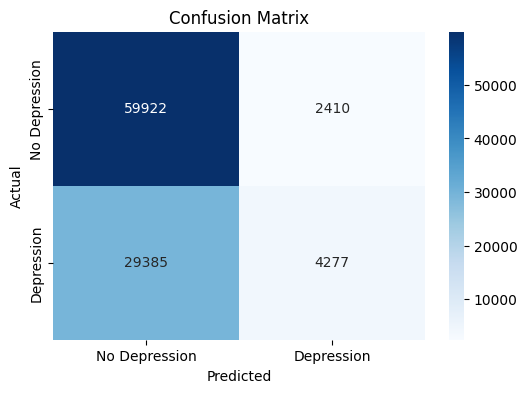

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('/content/after_generated.csv')


X = data.drop('depression', axis=1)  # Features
y = data['depression']  # Target variable


for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Random Forest Model Accuracy: {accuracy:.4f}')
print(f'Random Forest Model Precision: {precision:.4f}')
print(f'Random Forest Model Recall: {recall:.4f}')
print(f'Random Forest Model F1-Score: {f1:.4f}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Gradient Boosting Model Accuracy: 0.6717
Gradient Boosting Model Precision: 0.6551
Gradient Boosting Model Recall: 0.0456
Gradient Boosting Model F1-Score: 0.0852


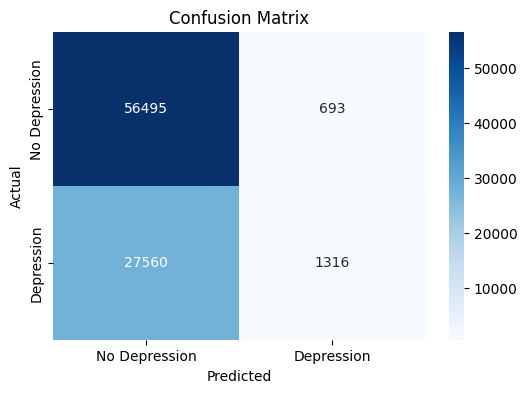

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('/content/sample_data/after_generated.csv')

X = data.drop('depression', axis=1)  # Features
y = data['depression']  # Target variable


for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Using GradientBoostingClassifier
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Gradient Boosting Model Accuracy: {accuracy:.4f}')
print(f'Gradient Boosting Model Precision: {precision:.4f}')
print(f'Gradient Boosting Model Recall: {recall:.4f}')
print(f'Gradient Boosting Model F1-Score: {f1:.4f}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


DecisionTreeClassifier - Accuracy: 0.6667, Precision: 0.5583, Recall: 0.0302, F1-Score: 0.0573


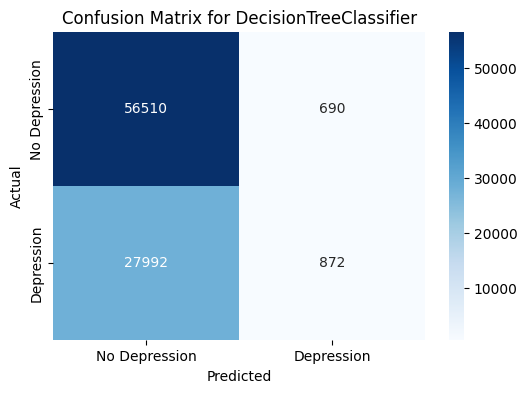

KNeighborsClassifier - Accuracy: 0.6667, Precision: 0.5546, Recall: 0.0315, F1-Score: 0.0596


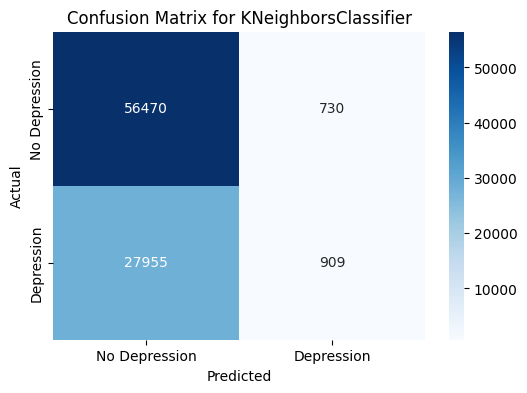

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/after_generated.csv')

features = ["Employment Status", "Sleep Patterns", "History of Mental Illness"]
X = data[features]
y = data["depression"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

def evaluate_model(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print(f"{model.__class__.__name__} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    cm = confusion_matrix(y_val, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for model_name, model in models.items():
    evaluate_model(model, X_train, X_val, y_train, y_val)
